In [38]:
!conda -V

conda 23.7.4


In [ ]:
!python -V

Python 3.8.18


In [35]:
import lxml

lxml.__version__

'4.9.3'

In [36]:
import cv2

cv2.__version__

'4.8.1'

In [37]:
import pandas

pandas.__version__

'2.0.3'

In [2]:
from glob import glob
import os

basePath = 'highway/valid/label/'

valid_filename = []
for filepath in glob(os.path.join(basePath, '*.xml')):
    filename = os.path.basename(filepath)  ## 상위폴더 경로 제거
    filename = filename[:-4]  ## .xml 제거
    valid_filename.append(filename)

len(valid_filename)

51

In [3]:
for folder in valid_filename:
    folderPath = os.path.join(basePath, folder)
    filepathList = glob(os.path.join(folderPath, '*'))
    print(len(filepathList))

150
150
50
50
150
230
150
100
50
150
230
150
100
100
150
149
150
150
625
150
150
150
150
50
150
150
150
100
50
50
150
150
150
625
150
150
150
150
625
147
149
150
150
625
150
150
150
150
624
31
224


In [4]:
basePath_image = 'highway/valid/image/'

for folder in valid_filename:
    folderPath = os.path.join(basePath_image, folder)
    filepathList = glob(os.path.join(folderPath, '*'))
    print(len(filepathList))

150
0
0
0
0
0
150
0
0
0
0
150
0
0
0
0
150
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


### valid image 채널별 가로세로 사이즈 동일한지 확인

In [5]:
import cv2
import numpy as np


def glob_files(path, file_type="*"):
    search_string = os.path.join(path, file_type)
    files = glob(search_string)

    # print('searching ', path)
    paths = []
    for f in files:
      if os.path.isdir(f):
        sub_paths = glob_files(f + '/')
        paths += sub_paths
      else:
        paths.append(f)

    # We sort the images in alphabetical order to match them
    #  to the annotation files
    paths.sort()

    return paths


# IMAGE_SIZE = 600

def load_images(path):
  files = glob_files(path, "*.png")

  # print(files)
  X_data = []
  for file in files:
    image = cv2.imread(file)
    # print(image.shape)
    # x = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

    X_data.append(image)
    
  return np.array(X_data)


for folder in valid_filename:
    folderPath = os.path.join(basePath_image, folder)
    X_test = load_images(folderPath)
    print(X_test.shape)

(150, 1920, 1080, 3)
(0,)
(0,)
(0,)
(0,)
(0,)
(150, 1080, 1920, 3)
(0,)
(0,)
(0,)
(0,)
(150, 1920, 1080, 3)
(0,)
(0,)
(0,)
(0,)
(150, 1920, 1080, 3)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)


- CH02만 가로 1920 세로 1080 가로길쭉 -> transpose만 해주면 되나...?
- 나머지는 세로길쭉


In [6]:
X_test_ch02 = load_images(os.path.join(basePath_image, 'Suwon_CH02_20200720_2130_MON_9m_NH_highway_TW5_sunny_FHD'))

In [10]:
type(X_test_ch02)

numpy.ndarray

In [12]:
X_test_ch02.transpose().shape

(3, 1920, 1080, 150)

완전 뒤집어서 transpose 되어 버림.

In [14]:
X_test_ch02[0].transpose().shape

(3, 1920, 1080)

In [15]:
X_test_ch02.transpose((0, 2, 1, 3)).shape

(150, 1920, 1080, 3)

이렇게 하면 일단 이미지 사이즈 형식은 통일됨. -> ch02의 모든 박스도 transpose 해줘야 하나...?

In [16]:
X_test_ch02_T = X_test_ch02.transpose((0, 2, 1, 3))

In [19]:
WIDTH = 1920
HEIGHT = 1080

def load_labels(path):
  files = glob_files(path, "*.txt")

  Y_data = []
  for file in files:
    with open(file) as f:
      lines = f.readlines()

      boxes = []
      for line in lines:
        tokens = line.split()

        class_id = int(tokens[0])
        xc = float(tokens[1]) * WIDTH
        yc = float(tokens[2]) * HEIGHT
        width = float(tokens[3]) * WIDTH
        height = float(tokens[4]) * HEIGHT

        boxes.append(np.array([class_id, xc, yc, width, height]))
        # print(class_id, xc, yc, width, height)

      Y_data.append(np.array(boxes))
      # print(lines)
  return Y_data  ## 이미지마다 탐지 대상 개수가 달라서(행 개수가 달라서) 정해진 shape의 넘파이 어레이로 변환할 수 없다! 변환하려면 패딩 등이 필요.

Y_test_ch02 = load_labels(os.path.join(basePath, 'Suwon_CH02_20200720_2130_MON_9m_NH_highway_TW5_sunny_FHD'))

In [24]:
Y_test_ch02[0]

array([[   0.    ,  758.6496,  181.7316,   52.1472,   41.8176],
       [   0.    ,  609.696 ,  170.2188,   54.0288,   38.5344],
       [   0.    , 1279.7376,  587.0448,  146.9568,  111.2292],
       [   0.    ,  495.5328,  167.1624,   34.2912,   35.2404],
       [   0.    ,  525.984 ,  527.364 ,  103.7376,  103.1292],
       [   0.    ,  800.8512,  584.5608,  132.4992,  111.6288],
       [   0.    ,  364.0704,  168.426 ,   41.8176,   43.6968],
       [   0.    ,  619.296 ,  221.7564,   62.592 ,   52.4448],
       [   0.    ,  703.584 ,  311.3964,   80.064 ,   68.2236],
       [   0.    ,  508.7808,  244.026 ,   68.2176,   56.376 ],
       [   0.    ,  919.5264,  276.7068,   84.576 ,   74.3796],
       [   0.    ,  467.424 ,  667.6884,  153.024 ,  140.832 ],
       [   2.    , 1348.2432,  198.2124,   81.984 ,   98.2368],
       [   0.    , 1536.9984,  365.0508,   95.808 ,   71.442 ]])

1번 칼럼과 2번 칼럼을 스위치, 3번 칼럼과 4번 칼럼을 스위치 해줘야 함.

In [27]:
Y_test_ch02[0][:, [2, 1, 4, 3]] = Y_test_ch02[0][:, [1, 2, 3, 4]]

In [28]:
Y_test_ch02[0]

array([[   0.    ,  181.7316,  758.6496,   41.8176,   52.1472],
       [   0.    ,  587.0448, 1279.7376,  111.2292,  146.9568],
       [   0.    ,  587.0448, 1279.7376,  111.2292,  146.9568],
       [   0.    ,  167.1624,  495.5328,   35.2404,   34.2912],
       [   0.    ,  527.364 ,  525.984 ,  103.1292,  103.7376],
       [   0.    ,  584.5608,  800.8512,  111.6288,  132.4992],
       [   0.    ,  168.426 ,  364.0704,   43.6968,   41.8176],
       [   0.    ,  221.7564,  619.296 ,   52.4448,   62.592 ],
       [   0.    ,  311.3964,  703.584 ,   68.2236,   80.064 ],
       [   0.    ,  244.026 ,  508.7808,   56.376 ,   68.2176],
       [   0.    ,  276.7068,  919.5264,   74.3796,   84.576 ],
       [   0.    ,  667.6884,  467.424 ,  140.832 ,  153.024 ],
       [   2.    ,  198.2124, 1348.2432,   98.2368,   81.984 ],
       [   0.    ,  365.0508, 1536.9984,   71.442 ,   95.808 ]])

In [29]:
for i in range(1, len(Y_test_ch02)):
    Y_test_ch02[i][:, [2, 1, 4, 3]] = Y_test_ch02[i][:, [1, 2, 3, 4]]

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def create_patch_rectangle(y, color):
  # # in yolov5
  width = int(y[2])
  height = int(y[3])
  return patches.Rectangle((int(y[0] - width/2), int(y[1] - height/2)),
                           width, height,
                           edgecolor=color, fill=False)

COLORS = [(0, 255/255, 0), (255/255, 255/255, 0), (255/255, 0, 0)]  ## car는 green, bus는 r + g(yellow?), truck은 red

def plot_image(image, boxes, axis):
  # # print(boxes.shape)
  for box in boxes:
    # print(box)
    class_id = int(box[0])
    # print(type(class_id), class_id)
    rect = create_patch_rectangle(box[1:], COLORS[class_id])
    axis.add_patch(rect)

  plt.imshow(image)

def plot_images(X, Y, limit=10):
  fig = plt.figure(figsize=(100, 80))

  last_id = min(limit, X.shape[0])
  for id in range(last_id):
    axis = fig.add_subplot(5, 3, id + 1)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    plot_image(X[id], Y[id], axis)

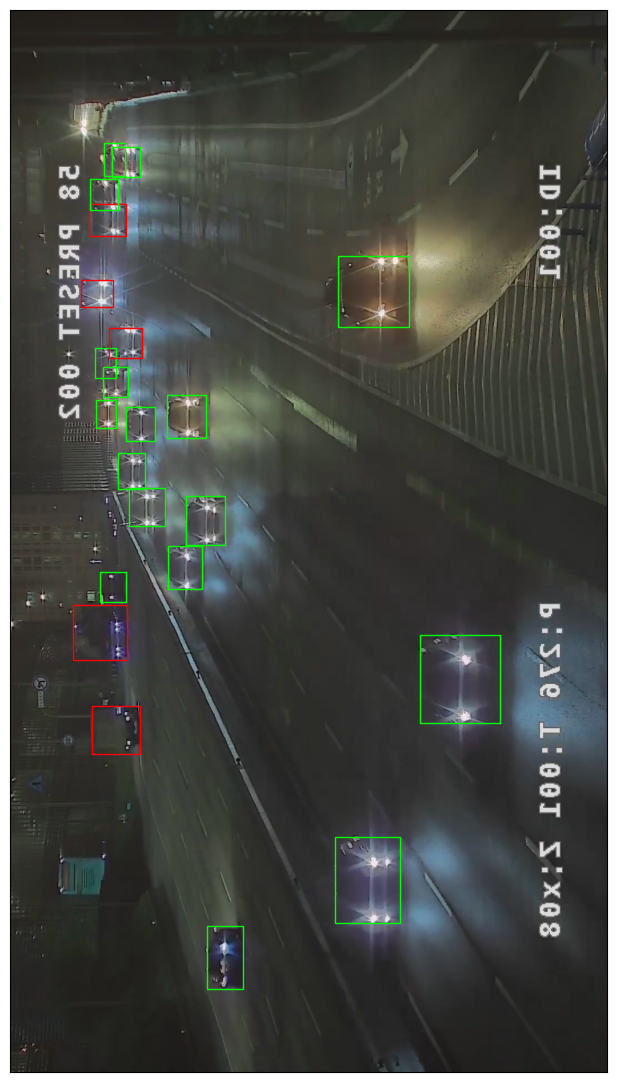

In [30]:
plot_images(np.array([X_test_ch02_T[-1]]), np.array([Y_test_ch02[-1]]))